Initialize and install libraries

In [2]:
#Import required libraries :

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.datasets import cifar10

import nltk
from nltk import sent_tokenize
from nltk import word_tokenize

import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [3]:
!pip install gdown
!pip install tensorflow_text

import tensorflow_text

     |████████████████████████████████| 2.6MB 2.6MB/s 


In [4]:
!pip install wordcloud
!pip install tensorflow.gpu

     |████████████████████████████████| 320.4MB 51kB/s 


Setup Word Cloud items and Random Seed

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Set random seed for purposes of reproducibility
#seed = 21


In [6]:
tf.test.is_gpu_available()
#tf.config.list_physical_devices('GPU')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

Read the CSV file with the Data from the Cloud

In [7]:
# loading in the data

#get the Data used :
Data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')


Display portions of the DataFrame for visual insepection of the Data

Data Set Description:

Formally, given sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist.

id : The id associated with the tweets in the given dataset.

tweets : The tweets collected from various sources and having either positive or negative sentiments associated with it.

label : A tweet with label ‘0’ is of positive sentiment while a tweet with label ‘1’ is of negative sentiment

In [8]:
Data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


Clean the data:

We are going to remove Stop words

We are going to remove "words" which are not alphabetic

We are going to remove "word" which are not in the english language

We are boing Lemmatize the "words" to their root.

In [9]:
#Import Libraries
from nltk.corpus import stopwords
from nltk.corpus import  wordnet
from nltk import WordNetLemmatizer

#Add column to Dataframe of tweet broken down into "words"
Data['tWords'] = Data.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)

#Copy the words to a list
lstWords = Data['tWords'].tolist()

#Copy the entire tweet to list, will replace with normalize sentence
lstSentences = Data['tweet'].tolist()

#Define Stop words
stopwords = stopwords.words("english")

#Init Lemmatizer
lemma = WordNetLemmatizer()

lstAllWords = []

#Loop through the Dataelements
for x in range(len(lstWords)):
  #List of words to add back to the Dataframe
  words_no_punc = []
  #Sentence to add back to the Dataframe
  txtSentence = ''

  #Loop through the list of words for the sentence
  for w in lstWords[x]:
    # is it alphabetic
    if w.isalpha():
      # is it not a stop word
      if w not in stopwords:
        # is the word in english
        if wordnet.synsets(w):
          #Yes to all, now we are going to add the lemmatize word to the list of words and sentence
          words_no_punc.append(lemma.lemmatize(w ,pos="v"))
          txtSentence = txtSentence + w + ' '

  #Update list value
  lstWords[x] = words_no_punc
  lstSentences[x] = txtSentence
  lstAllWords = lstAllWords + words_no_punc

#Update Dataframe
Data['normilezedWords'] = lstWords
Data['normilezedTweet'] = lstSentences


#Display Dataframe
Data

,id,label,tweet,tWords,normilezedWords,normilezedTweet
0,1,0,@user when a father is dysfunctional and is s...,"[@, user, when, a, father, is, dysfunctional, ...","[user, father, dysfunctional, selfish, drag, k...",user father dysfunctional selfish drags kids d...
1,2,0,@user @user thanks for #lyft credit i can't us...,"[@, user, @, user, thanks, for, #, lyft, credi...","[user, user, thank, credit, ca, use, cause, of...",user user thanks credit ca use cause offer whe...
2,3,0,bihday your majesty,"[bihday, your, majesty]",[majesty],majesty
3,4,0,#model i love u take with u all the time in ...,"[#, model, i, love, u, take, with, u, all, the...","[model, love, u, take, u, time]",model love u take u time
4,5,0,factsguide: society now #motivation,"[factsguide, :, society, now, #, motivation]","[society, motivation]",society motivation
...,...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,"[ate, @, user, isz, that, youuu, ?, ððð...","[eat, user]",ate user
31958,31959,0,to see nina turner on the airwaves trying to...,"[to, see, nina, turner, on, the, airwaves, try...","[see, nina, turner, airwaves, try, wrap, mantl...",see nina turner airwaves trying wrap mantle ge...
31959,31960,0,listening to sad songs on a monday morning otw...,"[listening, to, sad, songs, on, a, monday, mor...","[listen, sad, songs, monday, morning, work, sad]",listening sad songs monday morning work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","[@, user, #, sikh, #, temple, vandalised, in, ...","[user, sikh, temple, vandalise, calgary, conde...",user sikh temple vandalised calgary condemns act


Set up Universal Sentence Encoder

In [10]:
import tensorflow_hub as hub

use = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

Reduce Columns in Data Frame

In [11]:
Data = Data[["normilezedTweet", "label"]]

Data

,normilezedTweet,label
0,user father dysfunctional selfish drags kids d...,0
1,user user thanks credit ca use cause offer whe...,0
2,majesty,0
3,model love u take u time,0
4,society motivation,0
...,...,...
31957,ate user,0
31958,see nina turner airwaves trying wrap mantle ge...,0
31959,listening sad songs monday morning work sad,0
31960,user sikh temple vandalised calgary condemns act,1


In [12]:
print(Data.shape)

(31962, 2)


Word Cloud


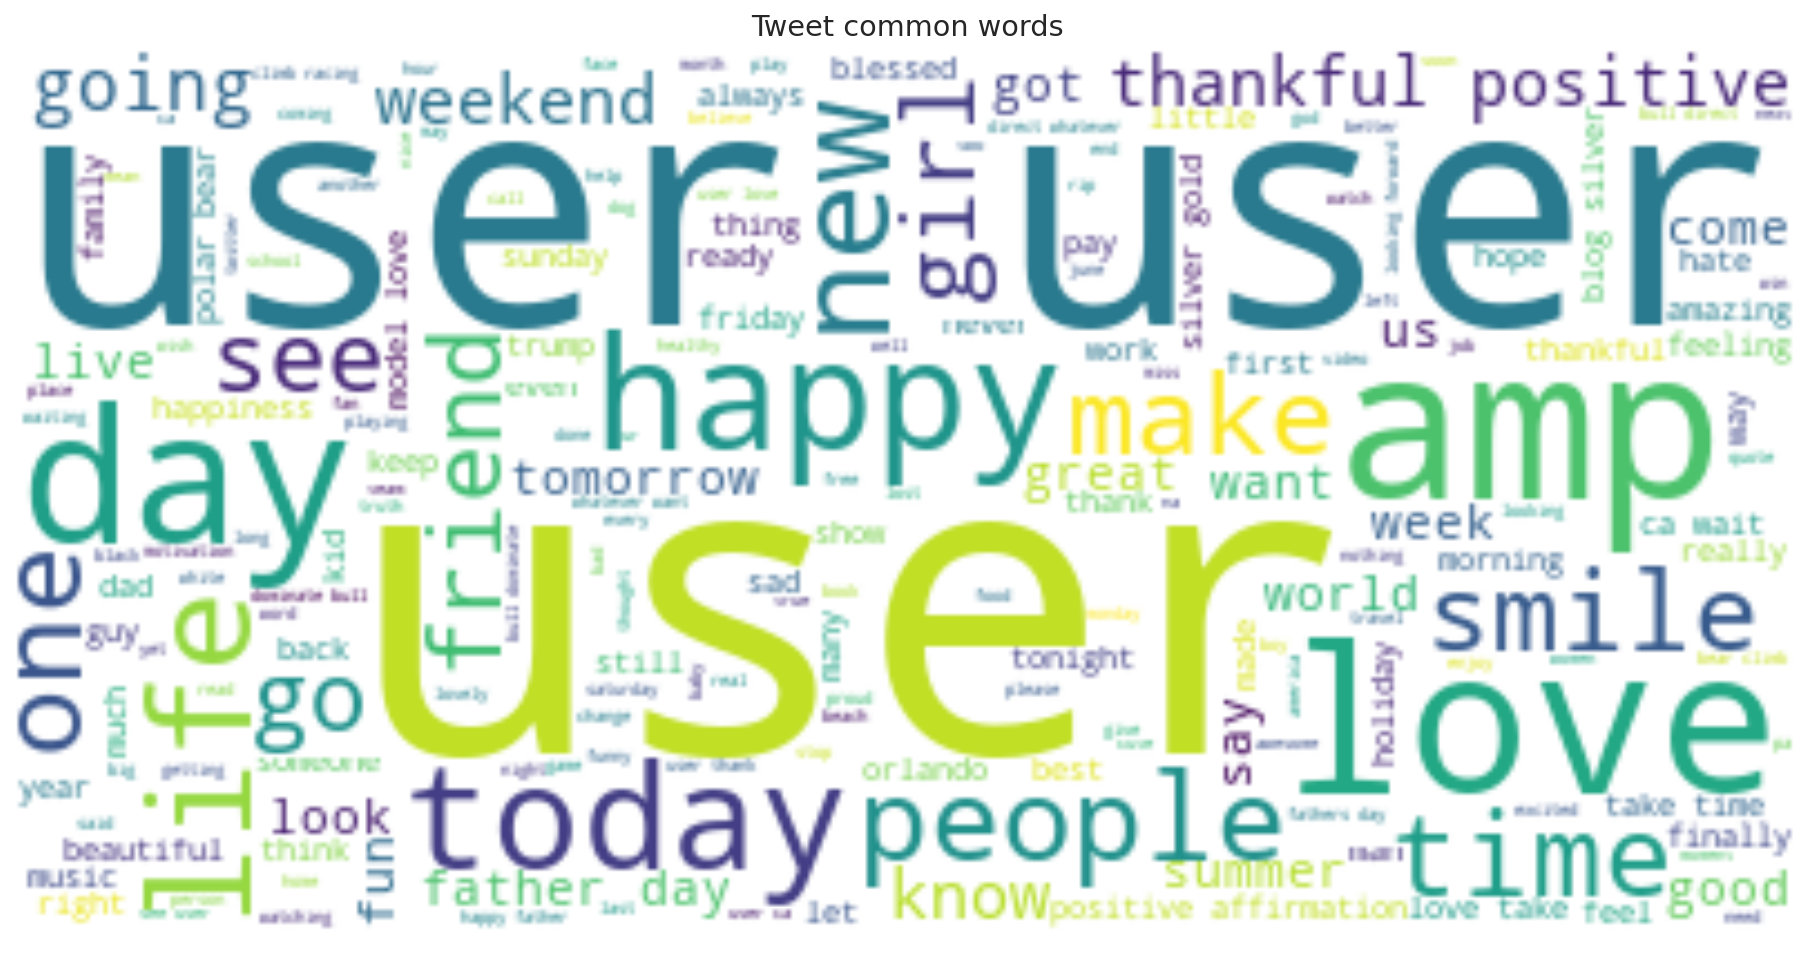

In [13]:
tweet_text = " ".join(Data.normilezedTweet.to_numpy().tolist())

tweet_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(tweet_text)

def show_word_cloud(cloud, title):
  plt.figure(figsize = (16, 10))
  plt.imshow(cloud, interpolation='bilinear')
  plt.title(title)
  plt.axis("off")
  plt.show();


show_word_cloud(tweet_cloud, "Tweet common words")

Set up Data for perform Deep learning

In [14]:
from sklearn.preprocessing import OneHotEncoder

type_one_hot = OneHotEncoder(sparse=False).fit_transform(
  Data.label.to_numpy().reshape(-1, 1)
)

In [15]:
train_tweets, test_tweets, y_train, y_test =\
  train_test_split(
    Data.normilezedTweet, 
    type_one_hot, 
    test_size=.1, 
    random_state=RANDOM_SEED
  )


Configure Training and Test Data

In [16]:
X_train = []
for r in tqdm(train_tweets):
  emb = use(r)
  tweet_emb = tf.reshape(emb, [-1]).numpy()
  X_train.append(tweet_emb)

X_train = np.array(X_train)  

100%|██████████| 28765/28765 [22:55<00:00, 20.91it/s]


In [17]:
X_test = []
for r in tqdm(test_tweets):
  emb = use(r)
  tweet_emb = tf.reshape(emb, [-1]).numpy()
  X_test.append(tweet_emb)

X_test = np.array(X_test)

100%|██████████| 3197/3197 [02:35<00:00, 20.62it/s]


In [58]:
print(y_train.shape, y_test.shape)

(28765, 2) (3197, 2)


In [59]:
print(X_train.shape, X_test.shape)

(28765, 512) (3197, 512)


Build Model

In [60]:
model = keras.Sequential()

model.add(
  keras.layers.Dense(
    units=256,
    input_shape=(X_train.shape[1], ),
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.5)
)

model.add(
  keras.layers.Dense(
    units=128,
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.5)
)

model.add(keras.layers.Dense(2, activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

Run Process

In [61]:
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

Epoch 1/25
1618/1618 [==============================] - 3s 2ms/step - loss: 0.1595 - accuracy: 0.9431 - val_loss: 0.1334 - val_accuracy: 0.9510
Epoch 2/25
1618/1618 [==============================] - 3s 2ms/step - loss: 0.1336 - accuracy: 0.9519 - val_loss: 0.1250 - val_accuracy: 0.9548
Epoch 3/25
1618/1618 [==============================] - 3s 2ms/step - loss: 0.1215 - accuracy: 0.9553 - val_loss: 0.1196 - val_accuracy: 0.9597
Epoch 4/25
1618/1618 [==============================] - 3s 2ms/step - loss: 0.1113 - accuracy: 0.9601 - val_loss: 0.1218 - val_accuracy: 0.9572
Epoch 5/25
1618/1618 [==============================] - 3s 2ms/step - loss: 0.1033 - accuracy: 0.9625 - val_loss: 0.1209 - val_accuracy: 0.9604
Epoch 6/25
1618/1618 [==============================] - 3s 2ms/step - loss: 0.0942 - accuracy: 0.9665 - val_loss: 0.1177 - val_accuracy: 0.9600
Epoch 7/25
1618/1618 [==============================] - 3s 2ms/step - loss: 0.0852 - accuracy: 0.9689 - val_loss: 0.1222 - val_accuracy:

Evaluate Model

In [62]:
model.evaluate(X_test, y_test)

100/100 [==============================] - 0s 1ms/step - loss: 0.2178 - accuracy: 0.9609


[0.2177833616733551, 0.9609008431434631]

In [65]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 258       
Total params: 164,482
Trainable params: 164,482
Non-trainable params: 0
_________________________________________________________________
None


In [64]:
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.09%
